# Statistical measure of the bias of NATL60 versus hydrographic data set EN4 : implementation for the july 15th, 2012

 - restrict EN4 data set to NATL60 boundaries
 - map of EN4 positions within NATL60 boundaries for july 2012
 - map of EN4 positions within NATL60 boundaries for july 15th, 2012
 - selection of NATL60 profiles that are within a distance of 0.25° and +/- 15 days of one given EN4 profile
 - map of selected of NATL60 profiles to one EN4 profile of july 15th, 2012
 - plots of statistical measures of selected NATL60 profiles versus EN4 profile (temperature and salinity)

## Imports and magics (for jupyter)

In [1]:
## magics

%load_ext version_information 
%version_information numpy,xarray,netCDF4,dask

Software versions
Python 2.7.11 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 4.2.0
OS Linux 3.16.0 4 amd64 x86_64 with debian 8.5
numpy 1.11.1
xarray 0.9.1
netCDF4 1.2.4
dask 0.15.2
Thu Sep 14 10:43:24 2017 CEST

In [2]:
## path for mdules

import sys
sys.path.insert(0,"/home/albert/lib/python")

In [3]:
## imports

import numpy as np
import dask
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd 
import datetime
import glob as glob
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
import time
from dask.diagnostics import ProgressBar
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Datasets

  - EN4 one file per month, we only open the july 2012 one
  - NATL60 CJM165 simulation that runs from June 15th, 2012 to September 30th, 2013, we only have local acces to July 2012 (407Go of data)

In [4]:
#EN4
dir_ar="/media/extra/DATA/ARGO/"
file072012="EN.4.2.0.f.profiles.g10.201207.nc"

tfile072012=dir_ar+file072012

!ls $tfile072012

/media/extra/DATA/ARGO/EN.4.2.0.f.profiles.g10.201207.nc


In [5]:
#NATL60

dir="/media/extra/DATA/NATL60/NATL60-CJM165-S/3d/"
files="NATL60-CJM165_y2012m07d*.1d_gridT.nc"

tfiles=dir+files

!ls $tfiles


/media/extra/DATA/NATL60/NATL60-CJM165-S/3d/NATL60-CJM165_y2012m07d01.1d_gridT.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/3d/NATL60-CJM165_y2012m07d02.1d_gridT.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/3d/NATL60-CJM165_y2012m07d03.1d_gridT.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/3d/NATL60-CJM165_y2012m07d04.1d_gridT.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/3d/NATL60-CJM165_y2012m07d05.1d_gridT.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/3d/NATL60-CJM165_y2012m07d06.1d_gridT.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/3d/NATL60-CJM165_y2012m07d07.1d_gridT.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/3d/NATL60-CJM165_y2012m07d08.1d_gridT.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/3d/NATL60-CJM165_y2012m07d09.1d_gridT.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/3d/NATL60-CJM165_y2012m07d10.1d_gridT.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/3d/NATL60-CJM165_y2012m07d11.1d_gridT.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/3d/NATL60-CJM165_y2012m07d12.1d_gridT.nc
/media/extra/DAT

## Selection of EN4 profiles that fall within NATL60 boundaries

In [6]:
##Open NATL60 files to get boundaries of domain

dsN = xr.open_mfdataset(tfiles,concat_dim='time_counter',decode_times=False, chunks={'deptht':1 ,'time_counter':1})

latN = dsN.nav_lat
lonN = dsN.nav_lon
tempN=dsN.votemper
saltN=dsN.vosaline
depN = dsN.deptht
timN = dsN.time_counter

lamin=np.nanmin(latN.values)
lamax=np.nanmax(latN.values)
lomin=np.nanmin(lonN.values)
lomax=np.nanmax(lonN.values)

print lamin,lamax,lomin,lomax

26.5648 67.3871 -86.255 17.7867


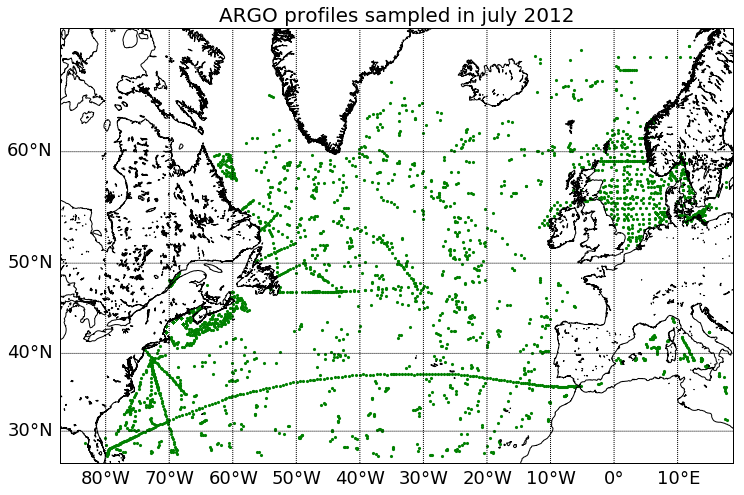

In [7]:
##Select all EN4 profile within NATL60 boundaries¶ sampled in july 2012

argo072012=xr.open_dataset(tfile072012)
dep_ar=argo072012['DEPH_CORRECTED']
lat_ar=argo072012['LATITUDE']
lon_ar=argo072012['LONGITUDE']
temp_ar=argo072012['POTM_CORRECTED']
salt_ar=argo072012['PSAL_CORRECTED']
day_ar=argo072012['JULD']

lon_arNbox = lon_ar.sel(N_PROF=(lon_ar>lomin)&(lon_ar<lomax)&(lat_ar>lamin)&(lat_ar<lamax), drop=True)    
lat_arNbox = lat_ar.sel(N_PROF=(lon_ar>lomin)&(lon_ar<lomax)&(lat_ar>lamin)&(lat_ar<lamax), drop=True)    
temp_arNbox = temp_ar.sel(N_PROF=(lon_ar>lomin)&(lon_ar<lomax)&(lat_ar>lamin)&(lat_ar<lamax), drop=True)    
salt_arNbox = salt_ar.sel(N_PROF=(lon_ar>lomin)&(lon_ar<lomax)&(lat_ar>lamin)&(lat_ar<lamax), drop=True)    
dep_arNbox = dep_ar.sel(N_PROF=(lon_ar>lomin)&(lon_ar<lomax)&(lat_ar>lamin)&(lat_ar<lamax), drop=True)    
day_arNbox = day_ar.sel(N_PROF=(lon_ar>lomin)&(lon_ar<lomax)&(lat_ar>lamin)&(lat_ar<lamax), drop=True)


fig1 = plt.figure(figsize=(14, 8))  # (w,h)

my_map0 = Basemap(projection='merc', lat_0=(lamin+lamax)/2, lon_0=(lomin+lomax)/2, 
resolution = 'i', 
llcrnrlon = lomin-1, llcrnrlat= lamin-1,
urcrnrlon = lomax+1, urcrnrlat = lamax+1, area_thresh = 10)

my_map0.drawcoastlines() 
my_map0.drawmapboundary()
my_map0.drawmeridians(np.arange(-120, 60, 10), labels=[1,0,0,1], size=18);
my_map0.drawparallels(np.arange(0, 80, 10), labels=[1,0,0,1], size=18);
my_map0.scatter(lon_arNbox.values, lat_arNbox.values, latlon=True, c='g', linewidth='0', s=10);
plt.title('ARGO profiles sampled in july 2012', size=20);



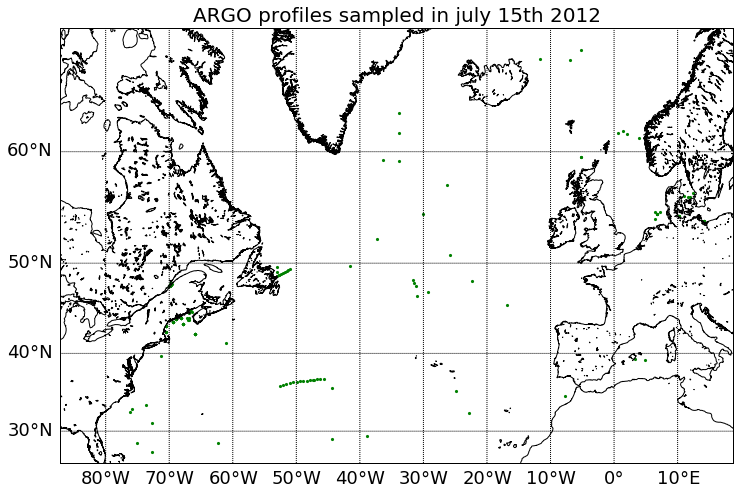

In [8]:
##Select all ARGO profiles within NATL60 boundaries¶ and sampled in july 15th, 2012

def find_date(day_ar,year,month,tday):
    prof=[]
    date=day_ar.values[:]
    for t in np.arange(0,len(date)):
        ts = pd.to_datetime(str(day_ar.values[t])) 
        dyear=ts.strftime('%Y')
        dmonth=ts.strftime('%m')
        dday=ts.strftime('%d')
        if dyear == year:
            if dmonth == month:
                if dday == tday:
                    prof.append(t)
        aprof=np.array(prof)
    return aprof

t15=find_date(day_arNbox,'2012','07','15')

fig1 = plt.figure(figsize=(14, 8))  # (w,h)

my_map0 = Basemap(projection='merc', lat_0=(lamin+lamax)/2, lon_0=(lomin+lomax)/2, 
resolution = 'i', 
llcrnrlon = lomin-1, llcrnrlat= lamin-1,
urcrnrlon = lomax+1, urcrnrlat = lamax+1, area_thresh = 10)

my_map0.drawcoastlines() 
my_map0.drawmapboundary()
my_map0.drawmeridians(np.arange(-120, 60, 10), labels=[1,0,0,1], size=18);
my_map0.drawparallels(np.arange(0, 80, 10), labels=[1,0,0,1], size=18);
my_map0.scatter(lon_arNbox[t15].values, lat_arNbox[t15].values, latlon=True, c='g', linewidth='0', s=10);
plt.title('ARGO profiles sampled in july 15th 2012', size=20);



## For one EN4 profile sampled in july 15th 2012, selection of NATL60 corresponding profiles that are within 0.25° distance and 15 days 

 - we extract the depth for each levels of the EN4 profile and find in NATL60 vertical grid the corresponding levels.
 - we determine a raw box in which the EN4 profile fall in order to manipulate smaller arrays (NATL60 total domain is 5422 x 3454)
 - we perform the selection of NATL60 profiles : all of them inside the 0.25° radius if step=1 or one every 3 if step=3
 - for each vertical levels previously identified, we create dask arrays of selected profiles of temperature and salinity and compute statistical measures that are mean, 10% and 90% percentile 
 - we display the map of locations of selected NATL60 profiles along with the position of the one EN4 profile
 - we display the meean, 10% and 90% percentile profile of NATL60 selceted profiles along with EN4 profile for both temperature and salinity

In [15]:
def model_profile_temp_salt_mean_percent10_90(prof_argo,step):

    #select NATL60 data at the closest depth and within 0.25° and 15days near the location and date of the ARGO profile
    observation_lon=lon_arNbox[t15[prof_argo]].values
    observation_lat=lat_arNbox[t15[prof_argo]].values
    observation_dep=dep_arNbox[t15[prof_argo]].values
    observation_temp=temp_arNbox[t15[prof_argo]].values
    observation_salt=salt_arNbox[t15[prof_argo]].values

    #print observation_lon,observation_lat

    dep_level=np.zeros(1)

    for k in np.arange(len(observation_dep)):
        if not np.isnan(observation_dep[k]):
            dep_level[0]=k
        
    #print dep_level

    model_level=np.zeros(dep_level[0])
    model_dep=np.zeros(dep_level[0])
    for z in np.arange(dep_level[0]):
        obs_dep=observation_dep[z]
        diff_dep=0*depN.values
        for k in np.arange(len(depN.values)):
            diff_dep[k]=depN.values[k]-obs_dep
        lev=np.where(np.abs(diff_dep)==np.min(np.abs(diff_dep)))
        model_level[z]=lev[0]
        model_dep[z]=depN.values[lev[0]]
    
    
    indxBOX=np.where((lonN>observation_lon-1)&(lonN<observation_lon+1)&(latN>observation_lat-1)&(latN<observation_lat+1))  
    model_lonBOX=lonN[np.min(indxBOX[0]):np.max(indxBOX[0]):step,np.min(indxBOX[1]):np.max(indxBOX[1]):step]
    model_latBOX=latN[np.min(indxBOX[0]):np.max(indxBOX[0]):step,np.min(indxBOX[1]):np.max(indxBOX[1]):step]
    model_lonBOX_array=model_lonBOX.values
    model_latBOX_array=model_latBOX.values
    t_dim=np.arange(len(timN.values))
    x_dim=np.arange(model_lonBOX_array.shape[1])
    y_dim=np.arange(model_lonBOX_array.shape[0])


    def profile_mean_percent(k):

        #decoupage grossier autour de la position du profile ARGO pour un niveau vertical
    
        model_tempBOX=tempN[:,k,np.min(indxBOX[0]):np.max(indxBOX[0]):step,np.min(indxBOX[1]):np.max(indxBOX[1]):step]
        model_saltBOX=saltN[:,k,np.min(indxBOX[0]):np.max(indxBOX[0]):step,np.min(indxBOX[1]):np.max(indxBOX[1]):step]
    
        model_tempBOX_array=model_tempBOX.values
        model_saltBOX_array=model_saltBOX.values
        time_array=timN.values

        # construction d'un nouveau xarray
        d = {}
        d['time_counter'] = ('time_counter',t_dim)
        d['y'] = ('y',y_dim)
        d['x'] = ('x',x_dim)
        d['nav_lat'] = (['y','x'],model_latBOX_array)
        d['nav_lon'] = (['y','x'],model_lonBOX_array)
    
        d['votemper'] = (['time_counter','y','x'], model_tempBOX_array)
        d['vosaline'] = (['time_counter','y','x'], model_saltBOX_array)
    
        dset = xr.Dataset(d)
        
        latB = dset.nav_lat
        lonB = dset.nav_lon
        model_temperatureB = dset.votemper
        model_salinityB = dset.vosaline
    
        # selection plus fine des profils
    
        model_temperature_stacked = model_temperatureB.stack(profile=('x', 'y'))
        model_salinity_stacked = model_salinityB.stack(profile=('x', 'y'))
        lon_stacked = lonB.stack(profile=('x', 'y'))
        lat_stacked = latB.stack(profile=('x', 'y'))
    
        distance_threshold = 0.25
        square_distance_to_observation = (lon_stacked - observation_lon)**2 + (lat_stacked-observation_lat)**2
        is_close_to_observation = square_distance_to_observation < distance_threshold**2
    
        model_temperature_near_observation = model_temperature_stacked.where(is_close_to_observation,drop=True)
        model_salinity_near_observation = model_salinity_stacked.where(is_close_to_observation, drop=True)
        lat_near_observation = lat_stacked.where(is_close_to_observation, drop=True)
        lon_near_observation = lon_stacked.where(is_close_to_observation, drop=True)
        
        model_temp_dask=dask.array.from_array(model_temperature_near_observation,chunks=(100,100))
        model_temp_dask_concat=dask.array.concatenate(model_temp_dask)
        model_salt_dask=dask.array.from_array(model_salinity_near_observation,chunks=(100,100))
        model_salt_dask_concat=dask.array.concatenate(model_salt_dask)
    
        temp_model_mean = model_temp_dask_concat.mean().compute()
        temp_percentile_10= np.percentile(model_temp_dask_concat,10)
        temp_percentile_90= np.percentile(model_temp_dask_concat,90)
        salt_model_mean = model_salt_dask_concat.mean().compute()
        salt_percentile_10= np.percentile(model_salt_dask_concat,10)
        salt_percentile_90= np.percentile(model_salt_dask_concat,90)

        return lat_near_observation,lon_near_observation,temp_model_mean,temp_percentile_10,temp_percentile_90,salt_model_mean,salt_percentile_10,salt_percentile_90

    profil_temp_model_mean=np.zeros(dep_level[0])
    profil_temp_model_percent10=np.zeros(dep_level[0])
    profil_temp_model_percent90=np.zeros(dep_level[0])
    profil_salt_model_mean=np.zeros(dep_level[0])
    profil_salt_model_percent10=np.zeros(dep_level[0])
    profil_salt_model_percent90=np.zeros(dep_level[0])


    for z in np.arange(dep_level[0]):
        lat_near_observation,lon_near_observation,temp_model_mean,temp_percentile_10,temp_percentile_90,salt_model_mean,salt_percentile_10,salt_percentile_90=profile_mean_percent(model_level[z].astype(int))
        profil_temp_model_mean[z]=temp_model_mean
        profil_temp_model_percent10[z]=temp_percentile_10
        profil_temp_model_percent90[z]=temp_percentile_90
        profil_salt_model_mean[z]=salt_model_mean
        profil_salt_model_percent10[z]=salt_percentile_10
        profil_salt_model_percent90[z]=salt_percentile_90
        
    gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[2,2])

    fig1 = plt.figure(figsize=(14, 16))  # (w,h)
    ax0b = plt.subplot(gs[0, 0])
    ax0 = plt.subplot(gs[0, 1])

    ax1 = plt.subplot(gs[1, 0])
    ax2 = plt.subplot(gs[1, 1])

    my_map0 = Basemap(projection='merc', lat_0=(lamin+lamax)/2, lon_0=(lomin+lomax)/2, 
    resolution = 'i', ax = ax0b,
    llcrnrlon = observation_lon-20, llcrnrlat= observation_lat-20,
    urcrnrlon = observation_lon+20, urcrnrlat = observation_lat+20, area_thresh = 10)

    my_map0.drawcoastlines() 
    my_map0.drawmapboundary()
    my_map0.drawmeridians(np.arange(-120, 60, 10), labels=[1,0,0,1], size=18)
    my_map0.drawparallels(np.arange(0, 80, 10), labels=[1,0,0,1], size=18)
    my_map0.scatter(lon_near_observation.values, lat_near_observation.values, latlon=True, c='r', linewidth='0', s=1)
    my_map0.scatter(observation_lon, observation_lat, latlon=True, c='g', linewidth='0', s=10)

    my_map1 = Basemap(projection='merc', lat_0=(lamin+lamax)/2, lon_0=(lomin+lomax)/2, 
    resolution = 'i', ax = ax0,
    llcrnrlon = observation_lon-1, llcrnrlat= observation_lat-1,
    urcrnrlon = observation_lon+1, urcrnrlat = observation_lat+1, area_thresh = 10)

    my_map1.drawcoastlines() 
    my_map1.drawmapboundary()
    my_map1.drawmeridians(np.arange(-120, 60, 1), labels=[1,0,0,1], size=18)
    my_map1.drawparallels(np.arange(0, 80, 1), labels=[1,0,0,1], size=18)
    my_map1.scatter(lon_near_observation.values, lat_near_observation.values, latlon=True, c='r', linewidth='0', s=1)
    my_map1.scatter(observation_lon, observation_lat, latlon=True, c='g', linewidth='0', s=10)

    ax1.plot(observation_temp,observation_dep,'b.-')
    ax1.set_xlabel('Potential temperature [$^\circ$C]', size=16)
    ax1.set_ylabel('Depth [m]', size=14)
    ax1.set_ylim(np.nanmax(observation_dep) + 10, 0)
    ax1.grid(True, which='both')
    ax1.xaxis.tick_top()
    ax1.xaxis.set_label_position('top') 
    ax1.plot(profil_temp_model_mean, model_dep, 'r.-', label='Natl60')
    ax1.plot(profil_temp_model_percent10, model_dep, 'r-', label='Percentile 10-90')
    ax1.plot(profil_temp_model_percent90, model_dep, 'r-')
    ax1.fill_betweenx(model_dep, profil_temp_model_percent10, x2=profil_temp_model_percent90, alpha=0.2, facecolor='r')

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    ax2.plot(observation_salt,observation_dep,'b.-', label='EN4')
    ax2.set_xlabel('Practical salinity [psu]', size=16)
    ax2.set_ylabel('Depth [m]', size=14)
    ax2.set_ylim(np.nanmax(observation_dep) + 10, 0)
    ax2.grid(True, which='both')
    ax2.xaxis.tick_top()
    ax2.xaxis.set_label_position('top')
    ax2.plot(profil_salt_model_mean, model_dep, 'r.-', label='Natl60')
    ax2.plot(profil_salt_model_percent10, model_dep, 'r-', label='Percentile 10-90')
    ax2.plot(profil_salt_model_percent90, model_dep, 'r-')
    ax2.fill_betweenx(model_dep, profil_salt_model_percent10, x2=profil_salt_model_percent90, alpha=0.2, facecolor='r')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.savefig('/media/extra/DATA/NATL60/NATL60-CJM165-PLOTS/comp_argo/comp_temp_salt_15072012_NATL60_ARGO'+str(prof_argo)+'_step'+str(step)+'.png')

## For one EN4 profile, the resulting plots for 2 cases :one with step=1 and the other with step=3

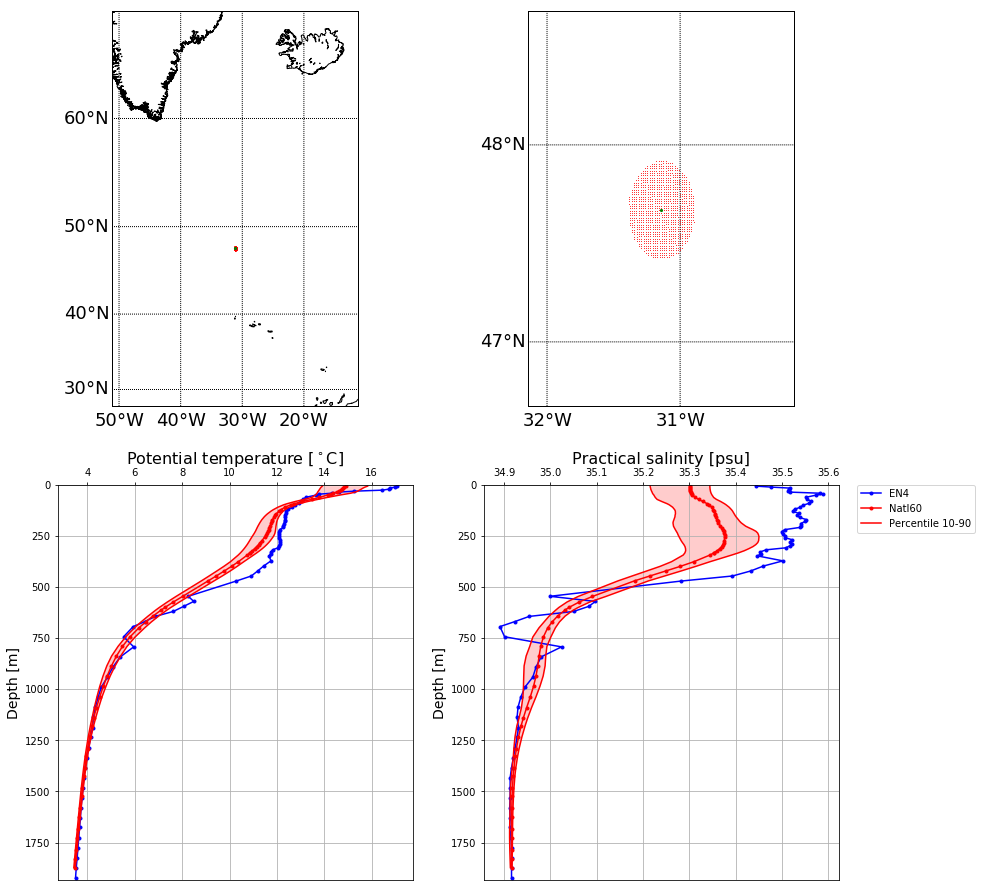

In [16]:
model_profile_temp_salt_mean_percent10_90(0,1)

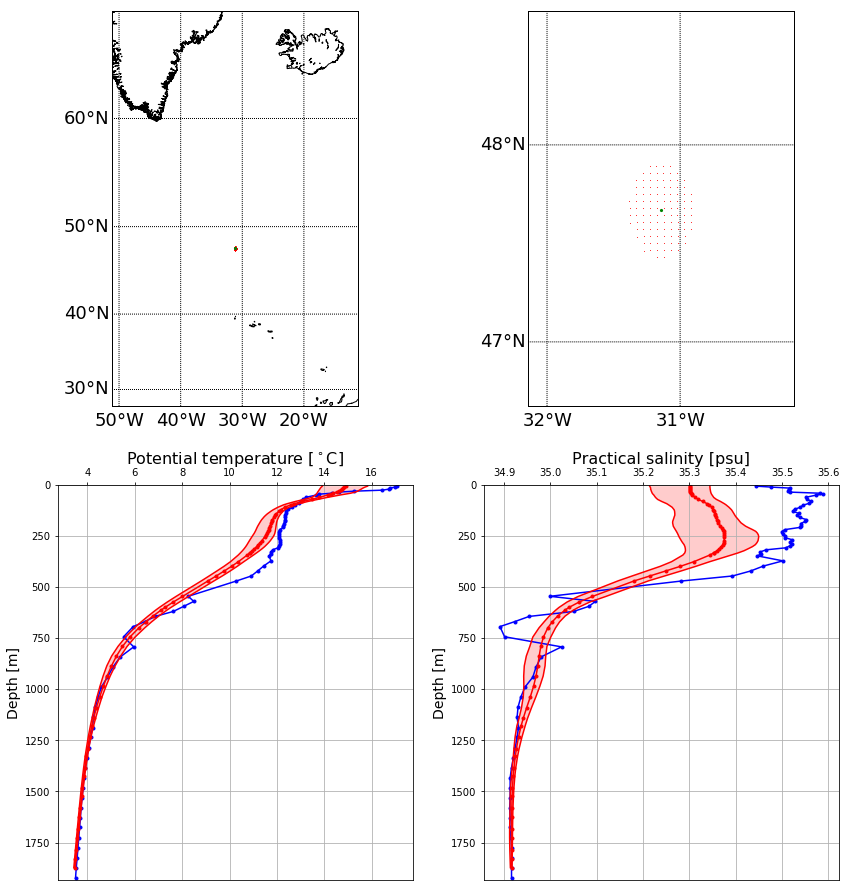

In [11]:
model_profile_temp_salt_mean_percent10_90(0,3)

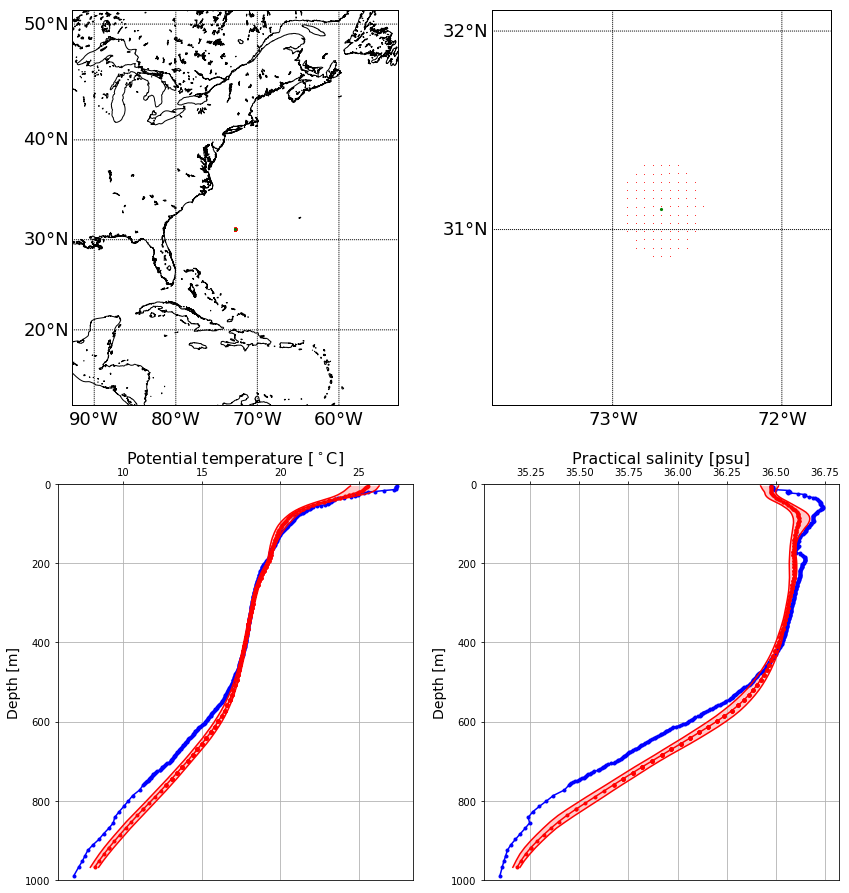

In [12]:
model_profile_temp_salt_mean_percent10_90(1,3)

In [1]:
import time
print time.strftime('%d/%m/%y %H:%M',time.localtime())  

13/09/17 15:15
